In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)


C:\Users\frcon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

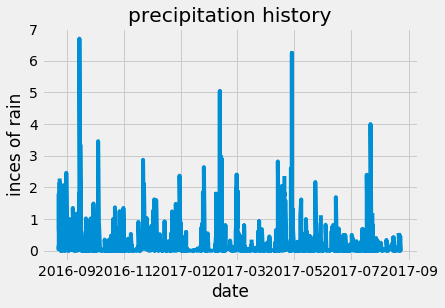

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
12
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
12
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent)
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2016,8,23) #hardcode 
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe1 = pd.DataFrame(precipitation)
dataframe1.dropna

# Sort the dataframe by date
dataframe1["date"] = pd.to_datetime(dataframe1.date)
dataframe1.sort_values(by = 'date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(dataframe1['date'], dataframe1['prcp'])
plt.title ("precipitation history")
plt.xlabel ("date")
plt.ylabel ("inces of rain")
plt.show

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.name)).all()

[(9)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
findstats = session.query(func.max(measurement.tobs).label("highest temp"), \
                    func.min(measurement.tobs).label("lowest temp"), \
                    func.avg(measurement.tobs)) \
                    .filter(measurement.station == "USC00519281").all()
findstats
                    

[(85.0, 54.0, 71.66378066378067)]

('2017-08-23',)


<function matplotlib.pyplot.show(*args, **kw)>

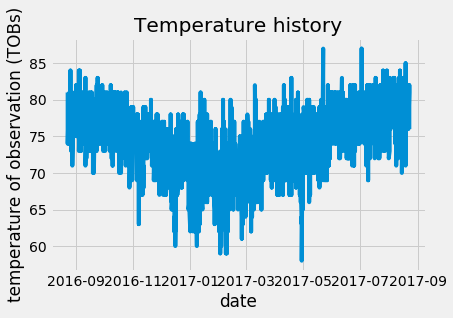

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent)
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2016,8,23) #hardcode 
# Perform a query to retrieve the data and precipitation scores
temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe2 = pd.DataFrame(temp)
dataframe2.dropna

# Sort the dataframe by date
dataframe2["date"] = pd.to_datetime(dataframe2.date)
dataframe2.sort_values(by = 'date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(dataframe2['date'], dataframe2['tobs'])
plt.title ("Temperature history")
plt.xlabel ("date")
plt.ylabel ("temperature of observation (TOBs)")
plt.show

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
